# Image Classification using Convolutional Neural Networks in PyTorch

In [1]:
# Importing required libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# Downloading dataset

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [5]:
# set batch size
batch_size = 128

In [6]:
transform = transforms.ToTensor()
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
target_classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
# find size of training and test dataset

len(trainset), len(testset)

(50000, 10000)

In [9]:
img, label = trainset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 6


tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [10]:

def show_example(img, label):
    print('Label: ', trainset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  frog (6)


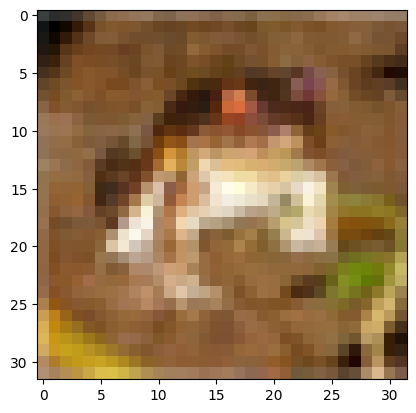

In [11]:
show_example(*trainset[0])

Label:  bird (2)


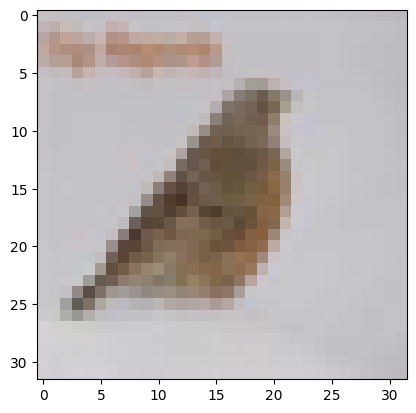

In [12]:
show_example(*trainset[108])

In [13]:
## Let's perform convolution operation between image and kernal

In [14]:
def conv_operation(image, kernel):
    #image dimension
    ri, ci = image.shape
    #kernal dimension
    rk, ck = kernel.shape
    #output featuremap dimension
    ro, co = ri-rk+1, ci-ck+1
    featuremap = torch.zeros([ro, co])
    for i in range(ro):
        for j in range(co):
            featuremap[i, j] = torch.sum(image[i:i+rk, j:j+ck] * kernel)
    return featuremap

In [15]:
# sampel inage, kernal and result

In [16]:
# 5X5
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

# 3X3
sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

# 3X3
conv_operation(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [17]:
### Train, test and validation split

In [18]:
random_seed = 42
torch.manual_seed(random_seed)

In [19]:
train_size = int(len(trainset) * 0.8)
val_size = int(len(trainset) * 0.2)

In [20]:
train_set, validation_set = torch.utils.data.random_split(trainset, [train_size, val_size])

In [21]:
len(train_set), len(validation_set), len(testset)

(40000, 10000, 10000)

In [22]:
### preper dataset to send in model

In [23]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True,
                                          num_workers=2, pin_memory=True)

test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True,
                                          num_workers=2, pin_memory=True)

val_loader = torch.utils.data.DataLoader(validation_set, batch_size=batch_size, shuffle=True,
                                          num_workers=2, pin_memory=True)

In [24]:
## Building a sequential model

In [25]:
class Cifar10CnnModel(nn.Module):
    def __init(self):
        super(Cifar10CnnModel, self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        return self.network(x)

In [26]:
cnnNet = Cifar10CnnModel()
cnnNet.to(device)

Cifar10CnnModel()

In [27]:
num_params = 0
for x in cnnNet.parameters():
    num_params += len(torch.flatten(x))

print(f'Number of parameters in the model: {num_params:,}')

Number of parameters in the model: 0


In [28]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnnNet.parameters(), lr=0.0001)

ValueError: optimizer got an empty parameter list